## Actividad 4 - Ejercicio 2

Es muy común identificar situaciones donde se deben realizar optimizaciones para encontrar el óptimo de una función dado un conjunto de restricciones iniciales. Identifica una problemática que cumpla con estas condiciones en tu entorno laboral y desarrolla un ejemplo completo en donde obtengas la solución utilizando el lenguaje de programación Python.

Para este caso con la premra de tiempo no me fue posible identificar una problemática que cumpla con estas condiciones en mi entorno laboral, así que tomé un problema encontrado en línea relacionado a la cantidad de mesas y sillas que un carpintero puede producir datas unas restricciones que se muestra a continuación:

El problema del carpintero se trata de determinar cuántas mesas y sillas debe fabricar por semana para maximizar el ingreso neto; pero primero se debe establecer una función objetivo La función objetivo obtenida después de los análisis es: $5m^{1/3} + 3s^{1/2}$, donde m y s representan la cantidad de mesas y sillas y 5 y 3 los ingresos netos por venta de una mesa y silla respectivamente. Los factores limitantes, que normalmente provienen del exterior, son las limitaciones de la mano de obra (esta limitación proviene de la familia del carpintero). Se miden los tiempos de producción requeridos para una mesa y una silla en distintos momentos del día y se calculan en 1.8 horas y 0.5 hora, respectivamente. Las horas laborales totales por semana son sólo 40.

La fórmula es:
$IngresoNeto(m, s) = 5*m^{1/3} + 3*s^{1/2}$



Importando librerías

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

Definiendo datos del problema

In [98]:
horas_mesa = 1.8
horas_silla = 0.5
horas_laborales = 40

Calculando restricciones mínimas y máximas

In [99]:
mesa_min = 0
mesa_max = horas_laborales/horas_mesa
silla_min = 0
silla_max = horas_laborales/horas_silla

In [100]:
print("Fabrica mesa maxima: ", mesa_max)
print("Fabrica silla maxima: ", silla_max)

Fabrica mesa maxima:  22.22222222222222
Fabrica silla maxima:  80.0


Presentando los datos gráficamente
Las horas totales gastadas son

$HorasTotales = 1.8*m + 0.5s$

Por lo que la función es:
$1.8*m + 0.5*s = 40$Se definen los métodos despejando cada variable.

In [101]:
def mesas(sillas, horas_laborales):
    return (40 - 0.5*sillas)/1.8

In [102]:
def sillas(mesas, horas_laborales):
    return (40 - 1.8*mesas)/0.5

Graficando forma posible de fabricación

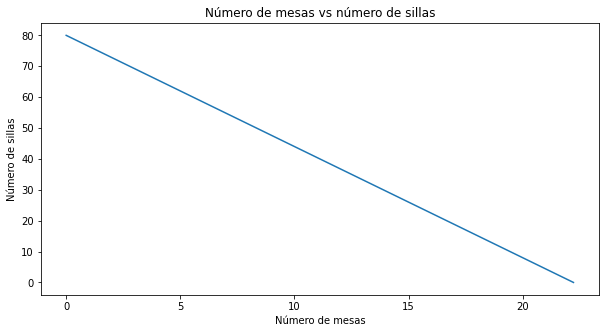

In [103]:

mesas_x = np.linspace(mesa_min, mesa_max, 100)
sillas_y = sillas(mesas_x, horas_laborales)

plt.figure(figsize=(10,5))
plt.plot(mesas_x, sillas_y)
plt.xlabel("Número de mesas")
plt.ylabel("Número de sillas")
plt.title("Número de mesas vs número de sillas")
plt.show()

Gráfica de la función de ingreso neto con restricciones

In [104]:
m, s = symbols('m s')
ingreso = 5*m**(1/3) + 3*s**(1/2)
ingreso

5*m**0.333333333333333 + 3*s**0.5

In [105]:
funcion_ingreso = lambdify([m, s], ingreso)

C:\Users\eomac\AppData\Local\Temp\ipykernel_27048\4075653177.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = figure.gca(projection='3d')


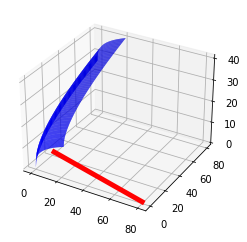

In [106]:
from mpl_toolkits.mplot3d import Axes3D
mesas_axis = np.linspace(mesa_min, mesa_max, 100)
sillas_axis = np.linspace(silla_min, silla_max, 100)
mesa_grid, silla_grid = np.meshgrid(mesas_axis, sillas_axis)

figure = plt.figure()
ax = figure.gca(projection='3d')

ax.plot_surface(mesa_grid, silla_grid, funcion_ingreso(mesa_grid, silla_grid), color='blue')
ax.plot(sillas_y, mesas_x, linewidth=5, color='red')
plt.show()

Generando mapa de color y contornos

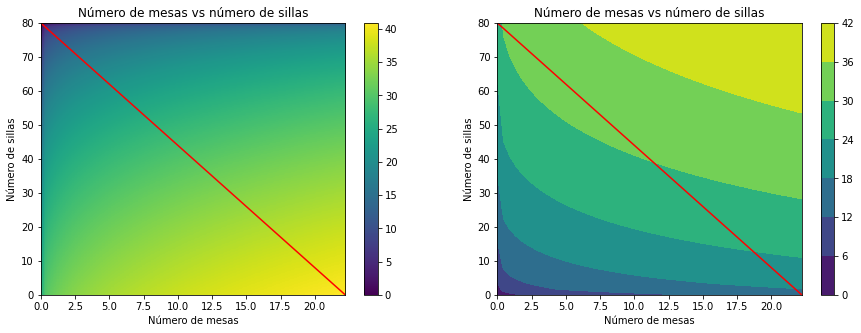

In [107]:
figure, (ax_l, ax_r) = plt.subplots(1, 2, figsize=(15,5))

mesas_axis = np.linspace(mesa_min, mesa_max, 100)
sillas_axis = np.linspace(silla_min, silla_max, 100)
mesas_grid, sillas_grid = np.meshgrid(mesas_axis, sillas_axis)

im = ax_l.imshow(funcion_ingreso(mesas_grid, sillas_grid), aspect='auto', extent=[mesa_min, mesa_max, silla_min, silla_max])
ax_l.plot(mesas_axis, sillas(mesas_axis, horas_laborales), color='red')
ax_l.set_xlabel("Número de mesas")
ax_l.set_ylabel("Número de sillas")
ax_l.set_title("Número de mesas vs número de sillas")

#Generando mapa de contornos
mesas_axis = np.linspace(mesa_min, mesa_max)
sillas_axis = np.linspace(silla_min, silla_max)
mesa_grid, silla_grid = np.meshgrid(mesas_axis, sillas_axis)

im2 = ax_r.contourf(funcion_ingreso(mesa_grid, silla_grid), extent=[mesa_min, mesa_max, silla_min, silla_max])
ax_r.plot(mesas_axis, sillas(mesas_axis, horas_laborales), color='red')
ax_r.set_xlabel("Número de mesas")
ax_r.set_ylabel("Número de sillas")
ax_r.set_title("Número de mesas vs número de sillas")

plt.colorbar(im, ax=ax_l)
plt.colorbar(im2, ax=ax_r)

plt.show()

Usando multiplicador de lagrange

In [108]:
s, l = symbols('s l')
fun1m_diff = ingreso.diff(m)
fun1s_diff = ingreso.diff(s)

In [109]:
funcion_2 = 2*m + s - 40
fun2m_diff = funcion_2.diff(m)
fun2s_diff = funcion_2.diff(s)

In [110]:
DL = np.array([fun1m_diff - l*fun2m_diff, fun1s_diff - l*fun2s_diff, -funcion_2])

In [111]:
solve([Eq(DL[0], 0), Eq(DL[1], 0), Eq(DL[2], 0)], [m, s, l], simplify=False)

[(5.24330923090775, 29.5133815381845, 0.276109769191249)]

Los valores optimos recomendados para maximizar el ingreso neto son:
Mesas: 5
Sillas: 29

In [112]:
print("Ingresos netos maximos: ", 5*5**(1/3) + 29*29**(1/2))

Ingresos netos maximos:  164.71965914028408
